<a href="https://colab.research.google.com/github/gabrielvinicios02/ExperimentsMultivariate/blob/f-DuasBases/ClassificadorXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries Temporais


<center>
<table><tr><td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
  <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>

In [3]:
#!pip3 install -U git+https://github.com/PYFTS/pyFTS
!pip3 install -U pyFTS
!pip3 install SimpSOM
!pip install dispy
#!pip install matplotlib==3.1.3

     |████████████████████████████████| 175 kB 5.8 MB/s 
     |████████████████████████████████| 11.2 MB 7.4 MB/s 
     |████████████████████████████████| 884 kB 55.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 424 kB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached pycos-4.12.1-py3-none-any.whl
  Created wheel for dispy: filename=dispy-4.15.0-py3-none-any.whl size=211557 sha256=0e7aff4f695d6c9499fb7e7effd60cd17f26ca7c5605ca0ccd4e5aadf6aa4362
  Stored in directory: /root/.cache/pip/wheels/ff/e3/ae/a39c5ac40b7c1c42e6ea2276a5a0fd066b17ccfab3a4746d0f
Successfully built dispy


In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures

In [5]:
from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf

datasets = {}

dff = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosFalha.xlsx')
dfn = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosNormais.xlsx')

dados_treino_Falha = dff[0:1200] 
dados_teste_Falha = dff[1200:1800]

dados_treino_Normal = dff[0:1200] 
dados_teste_Normal = dff[1200:1800]

In [6]:
print(dados_treino_Falha)

                    Data  ...  WIT_1085KS_2300_Rate
0    2021-12-05 08:50:13  ...          12190.730469
1    2021-12-05 08:51:25  ...          11984.549805
2    2021-12-05 08:52:37  ...          10856.699219
3    2021-12-05 08:53:49  ...          11106.334961
4    2021-12-05 08:55:01  ...          11941.248047
...                  ...  ...                   ...
1195 2021-12-08 00:43:01  ...          15319.503906
1196 2021-12-08 00:44:13  ...          15591.541016
1197 2021-12-08 00:45:25  ...          13825.541992
1198 2021-12-08 00:46:37  ...          14477.502930
1199 2021-12-08 00:47:49  ...          15409.520508

[1200 rows x 5 columns]


## Analisando as Séries Temporais

In [8]:
from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import hofts

datasets1 = {}
datasets2 = {}
datasets3 = {}
datasets4 = {}

#datasets['Gaussian Process'] = artificial.white_noise()
#datasets['Sun Spots'] = sunspots.get_data()
#datasets['Eletric Load'] = Malaysia.get_data('load')
#atasets['TAIEX'] = TAIEX.get_data()
#datasets['Temperature'] = Malaysia.get_data('temperature')

datasets1['LIT'] = dados_treino_Falha.get_data('LIT_2012KS_0251_FilteredSignal')
datasets1['SpeedActual'] = dados_treino_Falha.get_data('_AL_2012KS_06M1_SpeedActual')
datasets1['BeltLoad'] = dados_treino_Falha.get_data('WIT_1085KS_2300_BeltLoad')
datasets1['Rate'] = dados_treino_Falha.get_data('WIT_1085KS_2300_Rate')

datasets2['LIT'] = dados_treino_Normal.get_data('LIT_2012KS_0251_FilteredSignal')
datasets2['SpeedActual'] = dados_treino_Normal.get_data('_AL_2012KS_06M1_SpeedActual')
datasets2['BeltLoad'] = dados_treino_Normal.get_data('WIT_1085KS_2300_BeltLoad')
datasets2['Rate'] = dados_treino_Normal.get_data('WIT_1085KS_2300_Rate')

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=[20,10])

for ct, (key, data) in enumerate(datasets.items()): 
  _lags = np.arange(0,101)
  _acf = acf(data,nlags=100)
  _pacf = pacf(data,nlags=100)
  
  ax[0][ct].set_title("{}".format(key))
  ax[0][ct].plot(data)
  
  ax[1][ct].set_title("{} 100 intances".format(key))
  ax[1][ct].plot(data[:100])
  
  ax[2][ct].set_title("ACF {} - 100 lags".format(key))
  ax[2][ct].plot(_lags, _acf, "o")
  ax[2][ct].vlines(_lags,[0],_acf)
  ax[2][ct].axhline(y=0, color='black')
  
  ax[3][ct].set_title("PACF {} - 100 lags".format(key))
  ax[3][ct].plot(_lags, _pacf, "o")
  ax[3][ct].vlines(_lags,[0],_pacf)
  ax[3][ct].axhline(y=0, color='black')

plt.tight_layout()

AttributeError: ignored

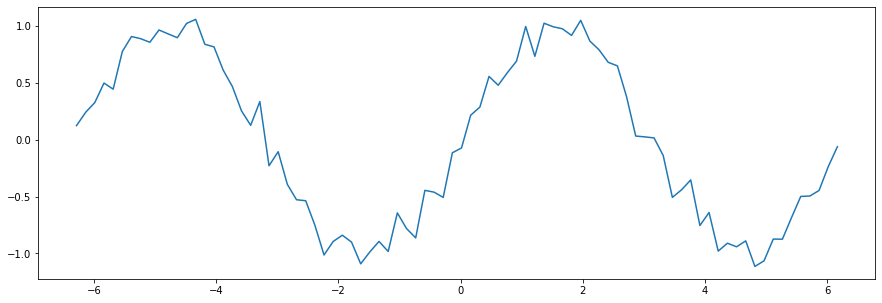

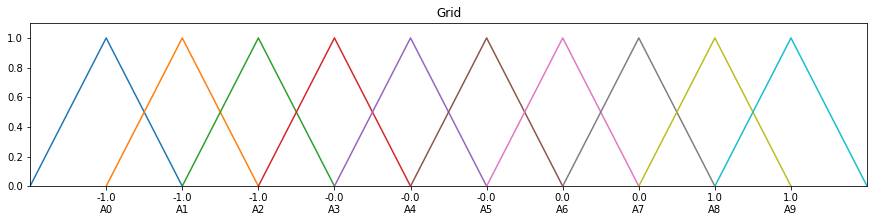

In [ ]:


dados_treino = y[:60] 

dados_teste = y[60:]


,Partitions,RMSE,MAPE,U
0,Grid,0.12,37.69,0.64
1,Entropy,0.16,55.11,0.82
2,FCM,0.13,32.82,0.68
3,CMeans,0.12,48.27,0.66


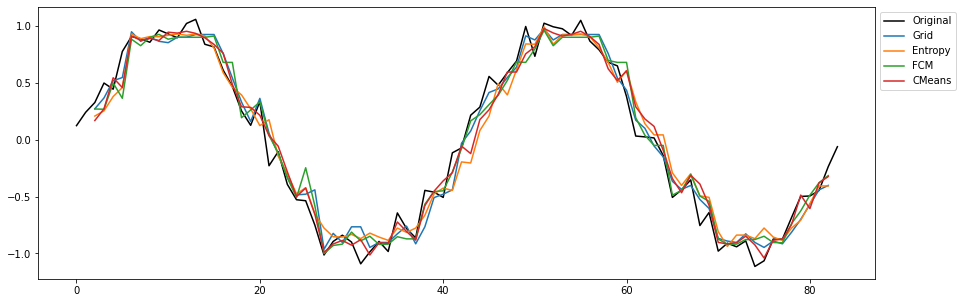

In [ ]:
from pyFTS.models import hofts
from pyFTS.partitioners import Grid, FCM, CMeans, Entropy
from pyFTS.benchmarks import Measures

metodos = [Grid.GridPartitioner, Entropy.EntropyPartitioner, FCM.FCMPartitioner, CMeans.CMeansPartitioner ]

k = 25

rows = []


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(y, label='Original',color='black')

for contador, metodo in enumerate(metodos):
  part = metodo(data=y, npart=k)
  model = hofts.HighOrderFTS(order=2, partitioner=part)
  model.fit(y)
  forecasts = model.predict(y)
  for o in range(model.order):
    forecasts.insert(0,None)
    
  ax.plot(forecasts[:-1], label=part.name)
  
  rmse, mape, u = Measures.get_point_statistics(y, model)
  
  rows.append([part.name, rmse, mape, u])
  

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

pd.DataFrame(rows, columns=['Partitions','RMSE','MAPE','U'])

In [ ]:
from pyFTS.models import chen, cheng, hofts, pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures

#metodos = [chen.ConventionalFTS, cheng.TrendWeightedFTS, hofts.HighOrderFTS, 
#          hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS]
metodos = [pwfts.ProbabilisticWeightedFTS]

k = 10

part = Grid.GridPartitioner(data=y, npart=k)

for contador, metodo in enumerate(metodos):
  model = metodo(partitioner=part)
  if model.is_high_order:
    model = metodo(partitioner=part, order=2)
  model.fit(y)
  print(model)

Probabilistic FTS:
(0.002) A0,A0 -> (0.527)A1, (0.473)A2
(0.014) A0,A1 -> (0.554)A1, (0.446)A2
(0.003) A0,A2 -> (0.5)A1, (0.5)A2
(0.01) A1,A0 -> (0.139)A0, (0.763)A1, (0.098)A2
(0.083) A1,A1 -> (0.074)A0, (0.558)A1, (0.303)A2, (0.063)A3, (0.003)A4
(0.049) A1,A2 -> (0.065)A0, (0.435)A1, (0.354)A2, (0.136)A3, (0.01)A4
(0.013) A1,A3 -> (0.076)A1, (0.395)A2, (0.447)A3, (0.082)A4
(0.002) A1,A4 -> (0.8)A3, (0.2)A4
(0.007) A2,A0 -> (0.147)A0, (0.766)A1, (0.087)A2
(0.052) A2,A1 -> (0.076)A0, (0.468)A1, (0.288)A2, (0.139)A3, (0.028)A4
(0.037) A2,A2 -> (0.054)A0, (0.437)A1, (0.204)A2, (0.257)A3, (0.048)A4
(0.023) A2,A3 -> (0.248)A1, (0.051)A2, (0.629)A3, (0.071)A4
(0.002) A2,A4 -> (0.826)A3, (0.174)A4
(0.007) A3,A1 -> (0.002)A0, (0.647)A1, (0.342)A2, (0.009)A3
(0.023) A3,A2 -> (0.055)A0, (0.555)A1, (0.283)A2, (0.108)A3
(0.074) A3,A3 -> (0.003)A1, (0.201)A2, (0.393)A3, (0.291)A4, (0.112)A5
(0.03) A3,A4 -> (0.006)A1, (0.205)A2, (0.135)A3, (0.254)A4, (0.4)A5
(0.01) A3,A5 -> (0.165)A4, (0.835)A5
(0.

In [ ]:
dataset = pd.read_excel('../content/sample_data/Base.xlsx')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

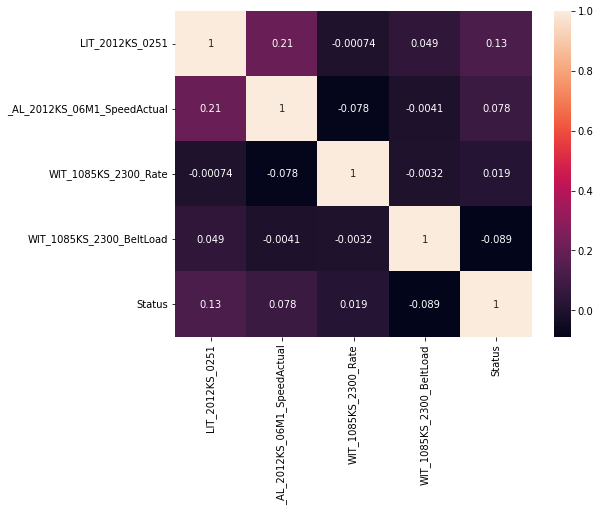

In [ ]:
import seaborn as sns
dataset2 = pd.read_excel('../content/sample_data/Base.xlsx')
corr_df = dataset2.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
print(dataset2)

      LIT_2012KS_0251  ...  Status
0           25.444870  ...       1
1           24.390213  ...       1
2           22.518898  ...       1
3           30.281023  ...       1
4           48.265495  ...       1
...               ...  ...     ...
6313         2.114453  ...       0
6314         2.566652  ...       0
6315         3.876476  ...       0
6316         3.395008  ...       0
6317         3.202985  ...       0

[6318 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 10)

In [ ]:
from xgboost import XGBClassifier
Classifier = XGBClassifier()
Classifier.fit(x_train, y_train)

XGBClassifier()

Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ypred = Classifier.predict(x_test)
cm = confusion_matrix(y_test, ypred)
print(cm)

[[281 197]
 [ 65 721]]


Precisão

In [ ]:
accuracy_score(y_test, ypred)

0.7927215189873418

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = 10)

print(accuracies.mean()*100)
print(accuracies.std()*100)

79.20349861073063
1.6023111356796393
